# Week 2 Problem Set

## Homeworks

**HW1.** *Min-Heap:* Write the following function to implement *min-heap*. A *min-heap* is a binary heap that satisfies the *min-heap property*. This property can be described as:

    For all nodes except the root:
    
    A[left(i)] >= A[i]
    A[right(i)] >= A[i]

- `min_child(heap, index)`: which returns the index of the node's smallest child. The node you are referring has index of value `index`
- `min_heapify(array, index, size)`: which moves the node at `index` down the tree so as to satisfy the *min-heap property*. The argument `index` is the index of the node you want to start moving down in the array. The argument `size` is the size of the heap. This size may be the same or less than the number of elements in the array. Hint: You may need the `min_child()` function.
- `build_min_heap(array)`: which build a *min-heap* from an arbitrary array of integers. This function should make use of `min_heapify(array, index)`. 

In [1]:
# Copy over the implementations of left_of & right_of from the Cohort qns
def left_of(index):
    return (index * 2) + 1

def right_of(index):
    return (index + 1) * 2

In [2]:
def min_child(heap, index):
    
    if right_of(index) >= len(heap):
        return left_of(index)
    else:
        left = heap[left_of(index)]
        right = heap[right_of(index)]
        if left < right:
            return left_of(index)
        else:
            return right_of(index)

In [3]:
minheap = [1, 2, 4, 3, 9, 7, 8, 10, 14, 16]
assert min_child(minheap, 0) == 1
assert min_child(minheap, 2) == 5
assert min_child(minheap, 3) == 7
assert min_child(minheap, 1) == 3

In [4]:
def min_heapify(array, index, size):
    current_index = index
    swapped = True
    while (left_of(current_index) < size) & swapped == True:
        swapped = False
        minchild_index = min_child(array, current_index)
        if array[minchild_index] < array[current_index]:
            array[minchild_index], array[current_index] = array[current_index], array[minchild_index]
            swapped = True
        current_index = minchild_index

In [5]:
array = [1, 3, 4, 2, 9, 7, 8, 10, 14, 16]
min_heapify(array, 1, len(array))
assert array == [1, 2, 4, 3, 9, 7, 8, 10, 14, 16]

In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [7]:
def build_min_heap(array):
    n = len(array)
    start = int(n/2 -1)
    for i in range (start, -1, -1):
        min_heapify(array, i, len(array))

In [8]:
array = [16, 14, 10, 8, 7, 9, 3, 2, 4, 1]
print(array)
build_min_heap(array)
print(array)
assert array == [1, 2, 3, 4, 7, 9, 10, 8, 16, 14]

[16, 14, 10, 8, 7, 9, 3, 2, 4, 1]
[1, 2, 3, 4, 7, 9, 10, 8, 16, 14]


**HW2.** *Heapsort:* Implement heapsort that makes use of *min-heap* instead of *max-heap*. This function returns a *new* array. The strategy is similar to max-heap, but we will use a new array to store the sorted output. Take note of the hints below:
- The top of the min-heap is always the smallest. You can take this element and put it into the output array.
- To find the next minimum, take the last element of the heap and put it into the first element of the array. Now, the tree is no longer a min-heap. Use `min_heapify()` to restore the min-heap property. This will result in a mean-heap where the first element of the array is the next minimum. You can then take out the top of the min-heap and put it into the output array.
- Reduce the heap size as you go.
- Return the new output array.

In [9]:
import random

def gen_random_int(number, seed):
    mylist = list(range(number))
    random.seed(seed)
    random.shuffle(mylist)
    return mylist

In [10]:
def heapsort(array):
    result = []
    build_min_heap(array)
    end_pos = len(array) - 1
    while end_pos >= 0:
        array[(end_pos)], array[0] = array[0], array[(end_pos)]
        temp = array.pop(-1)
        result.append(temp)
        min_heapify(array, 0, end_pos)
        end_pos -= 1
    return result

In [11]:
array = gen_random_int(10, 100)
result = heapsort(array)
assert result == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

**HW3.** Compute the computational time for Heap Sort algorithm implemented in Python for various number of inputs. Make use of `gen_random_int(n)` to generate the input array. Use the template below to generate computation time for different number of inputs: 10, 100, 1000, etc.

In [12]:
import time
import random

def run_function(f, x):
    start = time.time()
    f(x)
    end = time.time()
    return end-start

def gen_random_int(number, seed):
    mylist = list(range(number))
    random.seed(seed)
    random.shuffle(mylist)
    return mylist

time_heapsort = []
# set the maximum power for 10^power number of inputs
maxpower = 5

for n in range(1, maxpower + 1):
    # create array for 10^1, 10^2, etc 
    # use seed 100
    array = None
    
    # call run_function with heapsort and array as arguments
    # result = run_function(None, None)
    
    array = gen_random_int(10**n, 100)
    result = run_function(sorted, array)
    
    time_heapsort.append(result)

print(time_heapsort)

[2.1457672119140625e-06, 9.059906005859375e-06, 0.00010085105895996094, 0.0015108585357666016, 0.019230127334594727]


**HW4.** Plot the output of HW3 by first calculating a new x-axis computed as $n\log_2(n)$. Use the template below.

Reference:
- [Numpy Log2 function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log2.html)

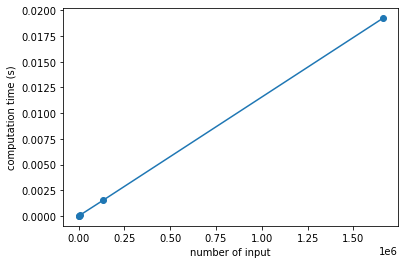

In [15]:
import matplotlib.pyplot as plt
import numpy as np

maxpower = 5
# create an iterable from 1 to maxpowers
powers = range(1, maxpower + 1)
# variable n stores the number of items to sort
n = []

# Create a list of n for our x axis
for exp in powers:
    n.append(10**exp)

# convert to Numpy array
n = np.array(n)

# calculate n*log(n) for x axis 
x = n * np.log2(n)
plt.plot(x, time_heapsort, "-o")
plt.xlabel("number of input")
plt.ylabel("computation time (s)")
plt.show()